In [490]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [491]:
df = pd.read_csv("data/Per 100 Poss.csv") # load dataset into a dataframe

# removing players from seasons prior to 2013 - prior to the modern era of basketball
df = df.drop(df[df.season < 2013].index)


# Pre-processing data

## Size of data and variable types

In [492]:
df.columns # list all the different columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg_per_100_poss',
       'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
       'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss',
       'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss',
       'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss',
       'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
       'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss',
       'pf_per_100_poss', 'pts_per_100_poss', 'o_rtg', 'd_rtg'],
      dtype='object')

In [493]:
df.dtypes # returns the datatype of each column

seas_id                int64
season                 int64
player_id              int64
player                object
birth_year           float64
pos                   object
age                    int64
experience             int64
lg                    object
tm                    object
g                      int64
gs                   float64
mp                     int64
fg_per_100_poss      float64
fga_per_100_poss     float64
fg_percent           float64
x3p_per_100_poss     float64
x3pa_per_100_poss    float64
x3p_percent          float64
x2p_per_100_poss     float64
x2pa_per_100_poss    float64
x2p_percent          float64
ft_per_100_poss      float64
fta_per_100_poss     float64
ft_percent           float64
orb_per_100_poss     float64
drb_per_100_poss     float64
trb_per_100_poss     float64
ast_per_100_poss     float64
stl_per_100_poss     float64
blk_per_100_poss     float64
tov_per_100_poss     float64
pf_per_100_poss      float64
pts_per_100_poss     float64
o_rtg         

In [494]:
df.shape # returns the shape of data - rows and columns

(7150, 36)

In [495]:
df.index

RangeIndex(start=0, stop=7150, step=1)

## Preliminary exploration of values in the data

In [496]:
df.sample(10) # view random rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
1832,29359,2021,3685,Kyle Lowry,NaN,PG,34,15,NBA,TOR,...,6.4,7.5,10.2,1.4,0.4,3.8,4.3,23.9,117.0,115.0
1149,30193,2022,4180,Mason Plumlee,NaN,C,31,9,NBA,CHO,...,10.4,15.1,6.0,1.6,1.4,2.7,6.0,12.8,122.0,111.0
5100,26108,2016,4179,Lorenzo Brown,NaN,PG,25,3,NBA,PHO,...,5.6,5.6,8.8,2.4,0.8,7.2,3.2,16.0,72.0,108.0
2895,27707,2019,4233,Dante Exum,NaN,PG,23,4,NBA,UTA,...,3.7,4.9,7.9,1.0,0.4,3.7,5.0,20.8,104.0,110.0
2090,29617,2021,3491,Udonis Haslem,NaN,C,40,18,NBA,MIA,...,16.6,16.6,0.0,0.0,0.0,0.0,0.0,66.2,200.0,111.0
5135,26143,2016,4116,Meyers Leonard,NaN,PF,23,4,NBA,POR,...,9.9,11.8,3.5,0.3,0.7,2.9,6.9,19.2,107.0,109.0
4340,26521,2017,3816,George Hill,NaN,PG,30,9,NBA,UTA,...,4.9,5.7,6.9,1.7,0.4,2.9,3.9,28.1,119.0,107.0
3493,26933,2018,4376,Alex Poythress,NaN,PF,24,2,NBA,IND,...,4.8,8.2,1.0,1.4,0.5,1.0,7.7,12.5,108.0,110.0
6424,24941,2014,3897,Othyus Jeffers,NaN,SG,28,3,NBA,TOT,...,8.5,9.6,1.1,0.0,0.0,1.1,3.2,9.6,113.0,107.0
5255,26263,2016,3720,Steve Novak,NaN,PF,32,10,NBA,OKC,...,8.3,8.3,0.0,0.0,0.0,2.1,2.1,35.2,126.0,110.0


In [497]:
df.head() # view first rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
0,30458,2023,5025,A.J. Green,NaN,SG,23,1,NBA,MIL,...,4.7,5.5,2.4,1.0,0.0,1.4,4.7,23.8,125.0,114.0
1,30459,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,TOT,...,6.4,7.9,0.8,0.8,0.0,0.8,6.4,27.0,118.0,118.0
2,30460,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,MIN,...,23.7,23.7,0.0,0.0,0.0,0.0,23.7,47.4,200.0,106.0
3,30461,2023,5026,A.J. Lawson,NaN,SG,22,1,NBA,DAL,...,5.8,7.4,0.8,0.8,0.0,0.8,5.8,26.3,116.0,119.0
4,30462,2023,4219,Aaron Gordon,NaN,PF,27,9,NBA,DEN,...,7.2,11.0,4.6,1.3,1.3,2.6,3.0,27.8,127.0,114.0


In [498]:
df.tail() # view last rows

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
7145,24478,2013,3492,Willie Green,NaN,SG,31,10,NBA,LAC,...,3.5,4.3,2.4,1.3,0.5,1.4,4.3,19.9,113.0,108.0
7146,24479,2013,3793,Wilson Chandler,NaN,PF,25,6,NBA,DEN,...,8.1,10.2,2.7,2.1,0.6,2.8,5.6,26.2,110.0,105.0
7147,24480,2013,3980,Xavier Henry,NaN,SF,21,3,NBA,NOH,...,6.0,7.8,1.1,1.4,0.4,2.7,6.2,16.8,94.0,111.0
7148,24481,2013,3363,Zach Randolph,NaN,PF,31,12,NBA,MEM,...,11.3,17.8,2.2,1.3,0.6,3.1,3.7,24.3,106.0,99.0
7149,24482,2013,3494,Zaza Pachulia,NaN,C,28,10,NBA,ATL,...,9.3,15.4,3.6,1.6,0.5,3.2,5.8,14.0,108.0,104.0


In [499]:
df.describe() # view the description of the numerical values in the data set 

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
count,7150.000000,7150.000000,7150.000000,53.000000,7150.000000,7150.000000,7150.000000,7150.000000,7150.000000,7149.000000,...,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7149.000000,7116.000000,7149.000000
mean,27484.500000,2018.191608,4186.560559,1986.981132,26.226713,5.459720,42.595245,19.522657,961.848811,7.153854,...,6.660330,8.941376,4.230648,1.556553,0.984068,2.702756,4.626549,19.186502,105.446318,109.792978
std,2064.171545,3.135926,424.977956,5.238506,4.157743,4.089226,25.501463,25.499963,797.908434,2.972217,...,3.324658,4.763022,2.950488,1.168565,1.102453,1.650478,2.569354,7.635843,20.088240,5.236136
min,23910.000000,2013.000000,2863.000000,1975.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
25%,25697.250000,2015.000000,3891.000000,1983.000000,23.000000,2.000000,20.000000,0.000000,233.250000,5.500000,...,4.500000,5.600000,2.200000,1.000000,0.300000,1.800000,3.300000,14.800000,99.000000,107.000000
50%,27484.500000,2018.000000,4188.500000,1987.000000,26.000000,4.000000,45.000000,6.000000,787.000000,7.000000,...,6.100000,7.800000,3.400000,1.400000,0.700000,2.500000,4.200000,18.700000,107.000000,110.000000
75%,29271.750000,2021.000000,4490.000000,1990.000000,29.000000,8.000000,66.000000,34.000000,1571.750000,8.800000,...,8.400000,11.600000,5.700000,1.900000,1.300000,3.400000,5.500000,23.300000,114.000000,113.000000
max,31059.000000,2023.000000,5100.000000,2002.000000,43.000000,22.000000,83.000000,82.000000,3167.000000,52.600000,...,49.700000,53.100000,49.000000,25.000000,24.100000,38.400000,99.800000,150.400000,300.000000,127.000000


In [500]:
 # get info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seas_id            7150 non-null   int64  
 1   season             7150 non-null   int64  
 2   player_id          7150 non-null   int64  
 3   player             7150 non-null   object 
 4   birth_year         53 non-null     float64
 5   pos                7150 non-null   object 
 6   age                7150 non-null   int64  
 7   experience         7150 non-null   int64  
 8   lg                 7150 non-null   object 
 9   tm                 7150 non-null   object 
 10  g                  7150 non-null   int64  
 11  gs                 7150 non-null   float64
 12  mp                 7150 non-null   int64  
 13  fg_per_100_poss    7149 non-null   float64
 14  fga_per_100_poss   7149 non-null   float64
 15  fg_percent         7099 non-null   float64
 16  x3p_per_100_poss   7149 

## Removing columns with too many or too few unique values

In [501]:
# print sum of unique values for each column
for col in df.columns:
  print(f"{col}: {len(df[col].unique())}")

seas_id: 7150
season: 11
player_id: 1459
player: 1455
birth_year: 15
pos: 16
age: 25
experience: 22
lg: 1
tm: 33
g: 83
gs: 83
mp: 2410
fg_per_100_poss: 181
fga_per_100_poss: 315
fg_percent: 494
x3p_per_100_poss: 90
x3pa_per_100_poss: 198
x3p_percent: 371
x2p_per_100_poss: 174
x2pa_per_100_poss: 283
x2p_percent: 466
ft_per_100_poss: 146
fta_per_100_poss: 173
ft_percent: 536
orb_per_100_poss: 128
drb_per_100_poss: 190
trb_per_100_poss: 267
ast_per_100_poss: 165
stl_per_100_poss: 98
blk_per_100_poss: 81
tov_per_100_poss: 129
pf_per_100_poss: 167
pts_per_100_poss: 432
o_rtg: 182
d_rtg: 51


In [502]:
# drop seas_id as values are unique for each row
df = df.drop(['seas_id'], axis=1)

# drop lg as it has too few unique values
df = df.drop(['lg'], axis=1)

## Removing/replacing NaN values

In [503]:
# get the number of missing data points per column
df.isnull().sum()

season                  0
player_id               0
player                  0
birth_year           7097
pos                     0
age                     0
experience              0
tm                      0
g                       0
gs                      0
mp                      0
fg_per_100_poss         1
fga_per_100_poss        1
fg_percent             51
x3p_per_100_poss        1
x3pa_per_100_poss       1
x3p_percent           659
x2p_per_100_poss        1
x2pa_per_100_poss       1
x2p_percent           113
ft_per_100_poss         1
fta_per_100_poss        1
ft_percent            441
orb_per_100_poss        1
drb_per_100_poss        1
trb_per_100_poss        1
ast_per_100_poss        1
stl_per_100_poss        1
blk_per_100_poss        1
tov_per_100_poss        1
pf_per_100_poss         1
pts_per_100_poss        1
o_rtg                  34
d_rtg                   1
dtype: int64

### Removing players that don't have enough minutes and games

In [504]:
# remove players that played less than 1/4 of all total games
df = df.drop(df[df.g < 30].index)

# remove players that played less than 1/4 of possible game time
df = df.drop(df[df.mp < (12)].index)

## most missing values were from players who did not play a lot of minutes/games
df.isnull().sum()

season                  0
player_id               0
player                  0
birth_year           4564
pos                     0
age                     0
experience              0
tm                      0
g                       0
gs                      0
mp                      0
fg_per_100_poss         0
fga_per_100_poss        0
fg_percent              0
x3p_per_100_poss        0
x3pa_per_100_poss       0
x3p_percent           232
x2p_per_100_poss        0
x2pa_per_100_poss       0
x2p_percent             0
ft_per_100_poss         0
fta_per_100_poss        0
ft_percent              2
orb_per_100_poss        0
drb_per_100_poss        0
trb_per_100_poss        0
ast_per_100_poss        0
stl_per_100_poss        0
blk_per_100_poss        0
tov_per_100_poss        0
pf_per_100_poss         0
pts_per_100_poss        0
o_rtg                   0
d_rtg                   0
dtype: int64

### Removing birth_year and filling NaN x3p percent

In [505]:
# drop birth year as it has too many null values and is not relevant
df = df.drop(['birth_year'], axis=1)

# replacing NaN values for 3 point shots % with 0
df['x3p_percent'] = df['x3p_percent'].fillna(0)

# replacing NaN values for ft % with 0
df['ft_percent'] = df['ft_percent'].fillna(0)

# no more missing values
df.isnull().sum()

season               0
player_id            0
player               0
pos                  0
age                  0
experience           0
tm                   0
g                    0
gs                   0
mp                   0
fg_per_100_poss      0
fga_per_100_poss     0
fg_percent           0
x3p_per_100_poss     0
x3pa_per_100_poss    0
x3p_percent          0
x2p_per_100_poss     0
x2pa_per_100_poss    0
x2p_percent          0
ft_per_100_poss      0
fta_per_100_poss     0
ft_percent           0
orb_per_100_poss     0
drb_per_100_poss     0
trb_per_100_poss     0
ast_per_100_poss     0
stl_per_100_poss     0
blk_per_100_poss     0
tov_per_100_poss     0
pf_per_100_poss      0
pts_per_100_poss     0
o_rtg                0
d_rtg                0
dtype: int64

## Removing columns that are irrelevant for clustering

In [507]:
# drop columns
df_dropped = df.drop(['season','player','player_id','experience','tm','age','gs','pos','g','mp'], axis=1)

df_dropped.columns


Index(['fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
       'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss',
       'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss',
       'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss',
       'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
       'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss',
       'pf_per_100_poss', 'pts_per_100_poss', 'o_rtg', 'd_rtg'],
      dtype='object')

In [508]:
df_dropped.head(10) # view first 10 rows

,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
4,10.6,18.0,0.587,1.6,4.1,0.397,9.0,13.9,0.644,5.0,...,7.2,11.0,4.6,1.3,1.3,2.6,3.0,27.8,127.0,114.0
5,5.1,12.3,0.417,2.0,4.9,0.413,3.1,7.4,0.420,1.6,...,3.0,4.3,4.3,1.8,0.7,1.9,4.5,13.9,109.0,117.0
6,6.5,15.6,0.418,3.0,8.3,0.357,3.5,7.3,0.487,3.1,...,5.7,7.3,2.4,1.5,0.8,1.8,6.6,19.0,110.0,117.0
7,6.3,12.4,0.505,1.8,4.4,0.405,4.5,8.0,0.559,2.2,...,5.5,8.2,3.5,1.2,0.4,2.1,4.1,16.5,120.0,116.0
9,8.6,18.1,0.477,3.5,8.8,0.394,5.1,9.3,0.555,1.1,...,3.8,4.8,2.3,1.6,0.3,1.4,2.8,21.8,115.0,117.0
10,5.5,11.8,0.464,3.2,7.7,0.422,2.3,4.2,0.542,0.5,...,8.0,9.9,4.2,0.8,1.4,1.0,3.0,14.7,128.0,112.0
11,8.7,19.7,0.440,4.2,10.0,0.424,4.5,9.8,0.456,6.5,...,5.6,6.4,4.7,1.6,0.3,2.5,4.2,28.1,120.0,120.0
12,7.5,17.0,0.440,2.7,7.1,0.376,4.8,10.0,0.486,1.5,...,7.8,11.0,4.3,1.4,2.9,2.9,4.0,19.1,107.0,111.0
13,3.7,8.4,0.442,1.6,4.2,0.381,2.1,4.2,0.505,1.9,...,5.0,6.2,6.4,3.3,1.3,2.6,4.9,10.9,112.0,109.0
17,10.1,18.0,0.562,0.4,1.2,0.316,9.7,16.8,0.580,5.2,...,9.6,14.9,6.2,1.4,1.6,4.3,5.8,25.8,120.0,116.0


## Scaling variables between 0 and 1

In [509]:
# make copy of dataframe
X = df_dropped.copy()
column_names = X.columns

# apply MinMaxScaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_names)

# show newly scaled dataframe
X.describe()

,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
count,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,...,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000
mean,0.431491,0.459840,0.445607,0.255623,0.289715,0.302362,0.352446,0.369936,0.440413,0.226986,...,0.342119,0.301861,0.275979,0.280101,0.149685,0.305662,0.313995,0.394518,0.541402,0.517643
std,0.146800,0.145132,0.121451,0.180881,0.188435,0.132560,0.168198,0.168039,0.100380,0.132328,...,0.169694,0.181321,0.175058,0.106959,0.134449,0.137380,0.129422,0.136361,0.104018,0.153137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324675,0.355346,0.366843,0.102564,0.143590,0.282000,0.228188,0.247273,0.375533,0.132867,...,0.212500,0.157895,0.145570,0.200000,0.058824,0.200000,0.225225,0.297593,0.478261,0.400000
50%,0.415584,0.446541,0.425044,0.256410,0.302564,0.339000,0.335570,0.352727,0.433855,0.202797,...,0.306250,0.250000,0.215190,0.272727,0.102941,0.280000,0.288288,0.378556,0.543478,0.533333
75%,0.525974,0.556604,0.502646,0.384615,0.425641,0.376500,0.463087,0.478182,0.496444,0.293706,...,0.450000,0.416667,0.367089,0.345455,0.191176,0.386667,0.387387,0.472648,0.608696,0.633333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reducing dimensions with PCA

# Exploration of data

<Axes: >

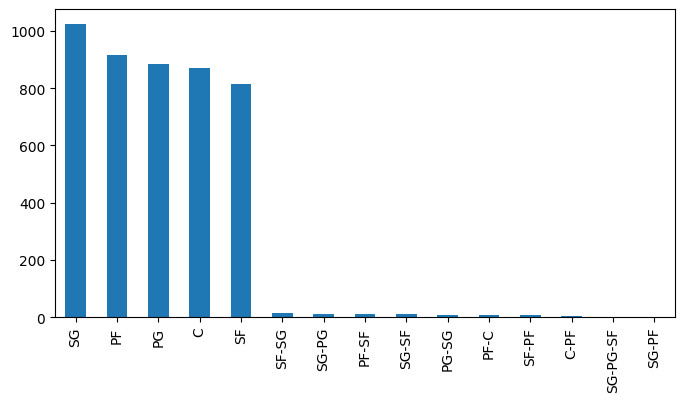

In [510]:
# look at all the different positions listed in the dataset
df['pos'].value_counts().plot.bar(figsize=(8, 4)) 

# Data Learning

## Kmeans

In [511]:
def kmeans(X, n_clusters):
    """
        Use KMeans to group the data into a specified number of clusters
        
        :param DataFrame X: scaled data to be clustered
        :param int n_clusters: number of clusters required
    """
    
    # Instantiate the model with a particular number of clusters and other parameters

    model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200,
                   n_init=10, random_state=0)
    
    # fit the model ... i.e. find the n clusters
    
    model.fit(X)
    
    # Return key cluster information: score, centres and labels
    
    return (model.inertia_, model.cluster_centers_, model.labels_)

## Selecting number of clusters

In [512]:
kbest_scores = []
for i in range(1, 11):
    score, centres, labels = kmeans(X, i)
    sizes = pd.Series(labels).value_counts().to_dict()
    print('KMeans has {} clusters with sizes {} with score {:.2f}'
          .format(i, sizes, score))
    kbest_scores.append(score)

silhouette_scores = []
for j in range(2,11):
    score, centres, labels = kmeans(X, j)
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters = {}, silhouette score is {})".format(j, silhouette_avg))
    silhouette_scores.append(silhouette_avg)


KMeans has 1 clusters with sizes {0: 4591} with score 2272.28
KMeans has 2 clusters with sizes {1: 3261, 0: 1330} with score 1634.39
KMeans has 3 clusters with sizes {2: 2299, 0: 1179, 1: 1113} with score 1343.03
KMeans has 4 clusters with sizes {0: 1468, 3: 1138, 1: 1090, 2: 895} with score 1244.78
KMeans has 5 clusters with sizes {4: 1361, 2: 1154, 0: 879, 3: 698, 1: 499} with score 1158.86
KMeans has 6 clusters with sizes {3: 1117, 1: 923, 4: 844, 5: 718, 2: 495, 0: 494} with score 1090.81
KMeans has 7 clusters with sizes {4: 933, 3: 827, 1: 700, 6: 654, 5: 615, 0: 492, 2: 370} with score 1028.55
KMeans has 8 clusters with sizes {4: 869, 5: 765, 3: 662, 0: 603, 7: 553, 6: 545, 1: 414, 2: 180} with score 994.21
KMeans has 9 clusters with sizes {4: 716, 7: 615, 6: 598, 2: 547, 1: 535, 3: 527, 8: 409, 0: 396, 5: 248} with score 965.71
KMeans has 10 clusters with sizes {7: 764, 2: 577, 8: 573, 4: 513, 9: 498, 5: 422, 6: 378, 3: 329, 1: 291, 0: 246} with score 939.80
For n_clusters = 2, 

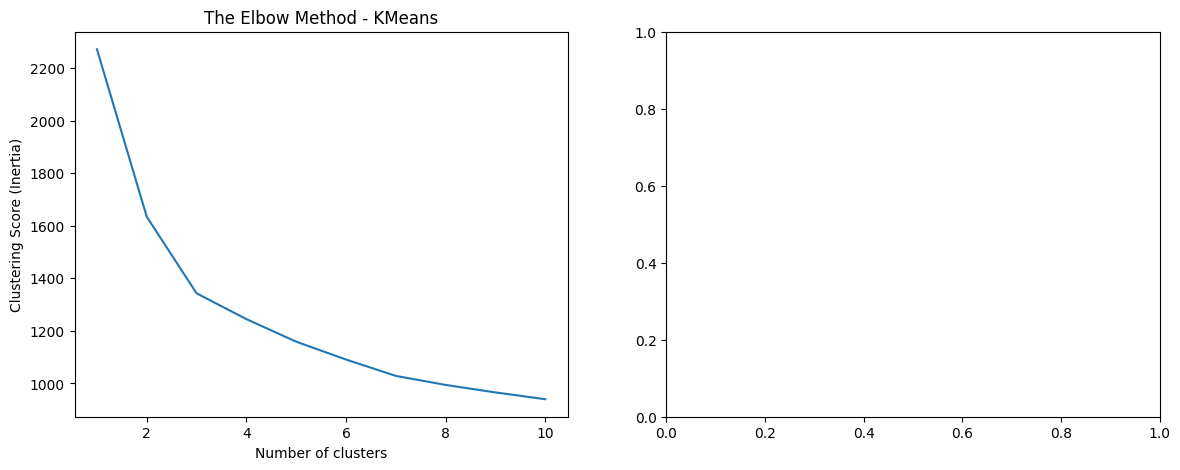

In [513]:
figure, axis = plt.subplots(1, 2, figsize=(14, 5))
axis[0].plot(range(1, 11), kbest_scores)
axis[0].set_title('The Elbow Method - KMeans')
axis[0].set_xlabel('Number of clusters')
axis[0].set_ylabel('Clustering Score (Inertia)')

plt.show() 

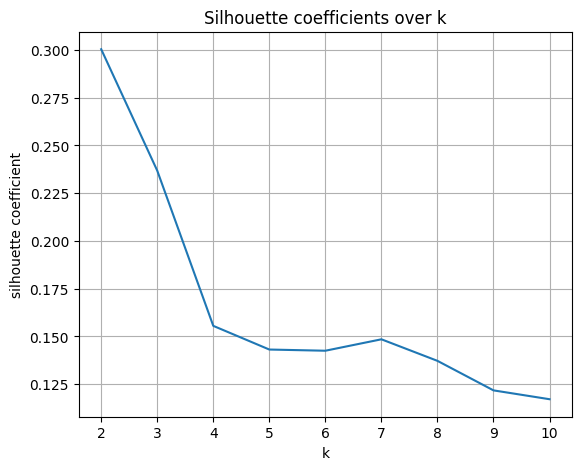

In [514]:
# Plot Silhouette coefficient
plt.figure(figsize=(14,5))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 11), silhouette_scores)
plt.grid(True)


In [516]:
positions = list(df['pos'])
def list_clusters(method, X, n_clusters, scaler, positions):
    
    score, centres, labels = method(X, n_clusters)
    
    sizes = pd.Series(labels).value_counts().to_dict()

    position_split = {}
    for i, label in enumerate(labels):
        position = positions[i]
        if label not in position_split:
            position_split[label] = {}
        if position not in position_split[label]:
            position_split[label][position] = 0
        position_split[label][position] += 1

    print('\nThere are {} clusters with a total score of {:.1f}\n'
          .format(len(sizes), score))

    # Re-scale the centres so that they have their original range and
    # put them in a dictionary to identify which variable they relate to
    # so that centres are meaningful

    for label, centre in enumerate(centres):
        centre = {X.columns[i]: 
                  round(centre[i] * scaler.data_range_[i] 
                        + scaler.data_min_[i], 2) for i in range(len(centre))}
        print('Cluster {} has {} players with positions {} and centre:\n{}\n'
              .format(label, sizes[label], position_split[label], centre))

    return

In [517]:
list_clusters(kmeans, X, 7, scaler, positions)


There are 7 clusters with a total score of 1028.5

Cluster 0 has 492 players with positions {'SG': 149, 'SF': 79, 'PF': 39, 'PG': 209, 'C': 12, 'PG-SG': 2, 'SF-SG': 2} and centre:
{'fg_per_100_poss': 11.03, 'fga_per_100_poss': 24.35, 'fg_percent': 0.45, 'x3p_per_100_poss': 2.86, 'x3pa_per_100_poss': 7.9, 'x3p_percent': 0.36, 'x2p_per_100_poss': 8.17, 'x2pa_per_100_poss': 16.45, 'x2p_percent': 0.5, 'ft_per_100_poss': 6.21, 'fta_per_100_poss': 7.52, 'ft_percent': 0.82, 'orb_per_100_poss': 1.23, 'drb_per_100_poss': 5.99, 'trb_per_100_poss': 7.22, 'ast_per_100_poss': 7.78, 'stl_per_100_poss': 1.73, 'blk_per_100_poss': 0.6, 'tov_per_100_poss': 3.97, 'pf_per_100_poss': 3.26, 'pts_per_100_poss': 31.13, 'o_rtg': 111.0, 'd_rtg': 110.34}

Cluster 1 has 700 players with positions {'PF': 318, 'C': 140, 'SF': 168, 'SG': 56, 'SF-SG': 2, 'C-PF': 2, 'PG': 6, 'SG-SF': 1, 'SG-PG': 1, 'SF-PF': 3, 'PF-C': 2, 'PF-SF': 1} and centre:
{'fg_per_100_poss': 8.04, 'fga_per_100_poss': 17.28, 'fg_percent': 0.47, 